In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium

%matplotlib inline

### Initial Quesitons
---
<ol>
    <li>What years does the data set cover?</li>
    <li>What neighborhoods have the most graffiti?</li>
    <li>What types of graffiti are most prominent?</li>
    <li>How many cases are still open? How many are closed? Which neighborhoods have the highest open cases? Closed?</li>
    <li>Explore "offensive" graffiti. Is there more offensive graffiti than not?</li>
</ol>

In [2]:
sf_graffiti = pd.read_csv('../data/Graffiti.csv')
sf_graffiti.head()

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,10931260,05/30/2019 04:24:00 PM,07/18/2020 01:00:33 AM,07/18/2020 01:00:33 AM,Closed,Administrative Closure - Case has aged - resub...,SFFD Other Queue,Graffiti,Graffiti on Other_enter_additional_details_below,Other_enter_additional_details_below - Offensive,"1515 SUTTER ST, SAN FRANCISCO, CA, 94109",5.0,Cathedral Hill,"(37.786838, -122.425451)",Mobile/Open311,http://mobile311.sfgov.org/reports/10931260/ph...
1,10893175,05/21/2019 06:51:00 PM,07/18/2020 01:00:33 AM,07/18/2020 01:00:33 AM,Closed,Administrative Closure - Case has aged - resub...,SFFD Other Queue,Graffiti,Graffiti on Building_commercial,Building_commercial - Not_Offensive,"109 OAK ST, SAN FRANCISCO, CA, 94102",5.0,Civic Center,"(37.7748711, -122.4209067)",Web,NaN
2,12088529,02/15/2020 11:02:23 AM,02/20/2020 09:50:01 AM,02/20/2020 09:50:01 AM,Closed,Case Resolved - meter shop has closed this req...,DPT Meter_Bike Queue,Graffiti,Graffiti on Parking_meter,Parking_meter - Offensive,"930 GOUGH ST, SAN FRANCISCO, CA, 94109",5.0,Cathedral Hill,"(37.78193333, -122.42400333)",Mobile/Open311,http://mobile311.sfgov.org/reports/12088529/ph...
3,12088520,02/15/2020 11:01:00 AM,02/20/2020 10:00:02 AM,02/20/2020 10:00:02 AM,Closed,Case Resolved - meter shop has closed this req...,DPT Meter_Bike Queue,Graffiti,Graffiti on Parking_meter,Parking_meter - Offensive,"880 GOUGH ST, SAN FRANCISCO, CA, 94102",5.0,Cathedral Hill,"(37.78135, -122.42388833)",Mobile/Open311,http://mobile311.sfgov.org/reports/12088520/ph...
4,11178898,07/25/2019 01:07:00 PM,07/18/2020 01:00:33 AM,07/18/2020 01:00:33 AM,Closed,Administrative Closure - Case has aged - resub...,SFFD Other Queue,Graffiti,Graffiti on Fire_Police_Callbox,Fire_Police_Callbox - Not_Offensive,Intersection of 2ND ST and STILLMAN ST,6.0,Rincon Hill,"(37.78359046, -122.39416819)",Mobile/Open311,http://mobile311.sfgov.org/reports/11178898/ph...


#### Change column names to lowercase, use underscores instead of spaces.

In [3]:
sf_graffiti.columns = ['caseid', 'opened', 'closed', 'updated', 'status', 'status_notes',
       'responsible_agency', 'category', 'request_type', 'request_details',
       'address', 'supervisor_district', 'neighborhood', 'point', 'source',
       'media_url']

#### Determine the value counts for each neighborhood

In [4]:
neighborhood_counts = sf_graffiti['neighborhood'].value_counts().to_frame().reset_index()

In [5]:
neighborhood_counts.columns = ['neighborhood', 'counts']

#### Which neighborhoods have over 10,000 cases?

In [6]:
top_10_neighborhoood_counts = neighborhood_counts[neighborhood_counts['counts'] > 10000].head(10)

#### Which neighborhoods have the most open cases?

In [7]:
status_counts = sf_graffiti[['neighborhood', 'status']]

In [8]:
status_counts.head()

,neighborhood,status
0,Cathedral Hill,Closed
1,Civic Center,Closed
2,Cathedral Hill,Closed
3,Cathedral Hill,Closed
4,Rincon Hill,Closed


In [9]:
open_status = sf_graffiti.query('status == "Open"')

In [10]:
#open_status.groupby('neighborhood')['status'].value_counts().sort_values(ascending = False).head(20)

#### What is the most prominent type of graffiti?

In [11]:
sf_graffiti['request_type'].value_counts().head(20)

Graffiti on Pole                                    85815
Graffiti on Building_commercial                     83923
Graffiti on Building_other                          57838
Graffiti on Other_enter_additional_details_below    55569
Graffiti on Signal_box                              41607
Graffiti on Building_residential                    36340
Graffiti on Mail_box                                34208
Graffiti on Sidewalk_in_front_of_property           34069
Graffiti on Transit_Shelter_Platform                21145
Graffiti on Sidewalk_structure                      20820
Graffiti on Parking_meter                           17765
Graffiti on City_receptacle                         15459
Graffiti on News_rack                               15021
Park - Structural_Maintenance                       10879
Graffiti                                            10878
Graffiti on Street                                   9770
Graffiti on Fire_Police_Callbox                      9346
Graffiti on Fi

#### Explore offensive graffiti. Is there more offensive graffiti than not? Is it concentrated in a specific neighborhood?

In [12]:
sf_graffiti[sf_graffiti['request_details'].str.match('Not_Offensive', na = False)]

,caseid,opened,closed,updated,status,status_notes,responsible_agency,category,request_type,request_details,address,supervisor_district,neighborhood,point,source,media_url
52928,473279,07/22/2009 03:51:29 PM,07/27/2009 05:11:10 PM,07/27/2009 05:11:10 PM,Closed,See Notes tab for more details,DPW Ops Queue,Graffiti,SSP Graffiti on Public Property,Not_Offensive,Intersection of HAIGHT ST and MASONIC AVE,5.0,Haight Ashbury,"(37.77021027, -122.44534302)",Web,NaN
99903,702316,07/28/2010 08:47:44 PM,09/28/2010 11:09:54 AM,09/28/2010 11:09:54 AM,Closed,See Notes tab for more details,DPW Ops Queue,Graffiti,SSP Graffiti on Public Property,Not_Offensive,Not associated with a specific address,NaN,NaN,"(0.0, 0.0)",Web,NaN
384103,381122,03/02/2009 06:04:43 AM,03/02/2009 10:10:01 AM,03/02/2009 10:10:01 AM,Closed,See Notes tab for more details,DPW Ops Queue,Graffiti,SSP Graffiti on Public Property,Not_Offensive,Intersection of CESAR CHAVEZ ON RAMP and POTRE...,10.0,Potrero Hill,"(37.75136566, -122.40618896)",Web,NaN
556315,11133834,07/15/2019 09:27:32 PM,07/29/2019 10:05:00 AM,07/29/2019 10:05:00 AM,Closed,Case is a Duplicate - Duplicate of SR#11133833,DPW Ops Queue,Graffiti,Graffiti on Public Property,Not_Offensive graffiti on a {{request_type.lab...,"461 CAPP ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.759489, -122.4177413)",Web,http://mobile311.sfgov.org/reports/11133834/ph...


In [13]:
#neighborhood_status = sf_graffiti.groupby('neighborhood')['status'].value_counts().to_frame()

In [14]:
#neighborhood_status.columns = ['counts']

In [15]:
#neighborhood_status.head()

In [16]:
#neighborhood_status.sort_values(by = 'counts', ascending = False)

In [17]:
sf_graffiti['status'].value_counts()

Closed    588525
Open        3233
Name: status, dtype: int64

#### Convert the 'opened' column to datetime.

In [18]:
sf_graffiti['opened'] = pd.to_datetime(sf_graffiti['opened'])

sf_graffiti['opened'].min()
Timestamp('2008-07-01 05:46:56')

sf_graffiti['opened'].max()
Timestamp('2020-08-28 01:02:00')

#### The dataset has opened cases going back to 2008.

In [19]:
sf_graffiti['opened_year'] = sf_graffiti['opened'].dt.year

In [20]:
sf_graffiti['opened_month'] = sf_graffiti['opened'].dt.month

In [21]:
sf_graffiti['opened_dayofweek'] = sf_graffiti['opened'].dt.dayofweek

In [22]:
sf_graffiti.head()

,caseid,opened,closed,updated,status,status_notes,responsible_agency,category,request_type,request_details,address,supervisor_district,neighborhood,point,source,media_url,opened_year,opened_month,opened_dayofweek
0,10931260,2019-05-30 16:24:00,07/18/2020 01:00:33 AM,07/18/2020 01:00:33 AM,Closed,Administrative Closure - Case has aged - resub...,SFFD Other Queue,Graffiti,Graffiti on Other_enter_additional_details_below,Other_enter_additional_details_below - Offensive,"1515 SUTTER ST, SAN FRANCISCO, CA, 94109",5.0,Cathedral Hill,"(37.786838, -122.425451)",Mobile/Open311,http://mobile311.sfgov.org/reports/10931260/ph...,2019,5,3
1,10893175,2019-05-21 18:51:00,07/18/2020 01:00:33 AM,07/18/2020 01:00:33 AM,Closed,Administrative Closure - Case has aged - resub...,SFFD Other Queue,Graffiti,Graffiti on Building_commercial,Building_commercial - Not_Offensive,"109 OAK ST, SAN FRANCISCO, CA, 94102",5.0,Civic Center,"(37.7748711, -122.4209067)",Web,NaN,2019,5,1
2,12088529,2020-02-15 11:02:23,02/20/2020 09:50:01 AM,02/20/2020 09:50:01 AM,Closed,Case Resolved - meter shop has closed this req...,DPT Meter_Bike Queue,Graffiti,Graffiti on Parking_meter,Parking_meter - Offensive,"930 GOUGH ST, SAN FRANCISCO, CA, 94109",5.0,Cathedral Hill,"(37.78193333, -122.42400333)",Mobile/Open311,http://mobile311.sfgov.org/reports/12088529/ph...,2020,2,5
3,12088520,2020-02-15 11:01:00,02/20/2020 10:00:02 AM,02/20/2020 10:00:02 AM,Closed,Case Resolved - meter shop has closed this req...,DPT Meter_Bike Queue,Graffiti,Graffiti on Parking_meter,Parking_meter - Offensive,"880 GOUGH ST, SAN FRANCISCO, CA, 94102",5.0,Cathedral Hill,"(37.78135, -122.42388833)",Mobile/Open311,http://mobile311.sfgov.org/reports/12088520/ph...,2020,2,5
4,11178898,2019-07-25 13:07:00,07/18/2020 01:00:33 AM,07/18/2020 01:00:33 AM,Closed,Administrative Closure - Case has aged - resub...,SFFD Other Queue,Graffiti,Graffiti on Fire_Police_Callbox,Fire_Police_Callbox - Not_Offensive,Intersection of 2ND ST and STILLMAN ST,6.0,Rincon Hill,"(37.78359046, -122.39416819)",Mobile/Open311,http://mobile311.sfgov.org/reports/11178898/ph...,2019,7,3


#### Show a graph of which neighborhoods have the most graffiti.

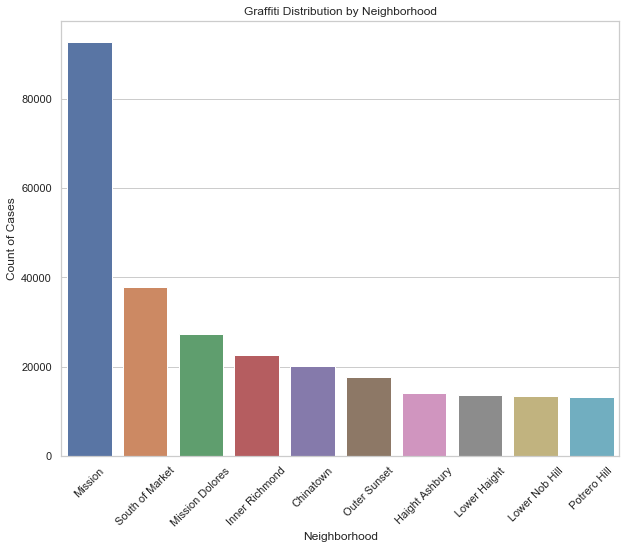

In [23]:
plt.figure(figsize = (10, 8))
sns.set(style="whitegrid")
chart = sns.barplot('neighborhood', 'counts', data = top_10_neighborhoood_counts)
plt.xlabel('Neighborhood')
plt.ylabel('Count of Cases')
plt.title('Graffiti Distribution by Neighborhood')
plt.setp(chart.get_xticklabels(), rotation=45);

#### Let's find out more about the Mission. 
<ol>
    <li>How have the counts changed over time? Have they increased or decreased?</li>
    <li>Is Mission Dolores technically part of the Mission?</li>
    <li>What is the highest amount of cases in a single day?</li>
    <li>What kind of economic data can we bring in about the city? About the Mission?</li>

In [24]:
mission = sf_graffiti[(sf_graffiti.neighborhood.isin(['Mission']))]

In [25]:
mission_case_count = mission.opened_year \
    .value_counts() \
    .to_frame() \
    .reset_index() \
    .rename(columns = {'index' : 'opened_year', 'opened_year' : 'case_count'}) \
    .sort_values(by = 'opened_year')

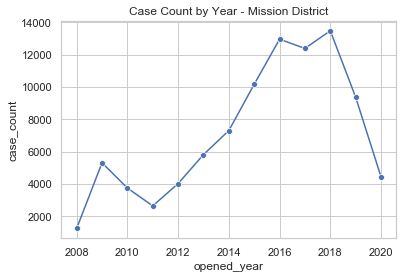

In [65]:
sns.lineplot('opened_year', 'case_count', data = mission_case_count, marker='o')
plt.title('Case Count by Year - Mission District')
plt.show()

#### What about the city as a whole? Are cases on the decline in recent years?

In [27]:
total_case_count_year = sf_graffiti['opened_year'] \
    .value_counts() \
    .to_frame() \
    .reset_index() \
    .rename(columns = {'index' : 'opened_year', 'opened_year' : 'case_count'}) \
    .sort_values(by = 'opened_year')

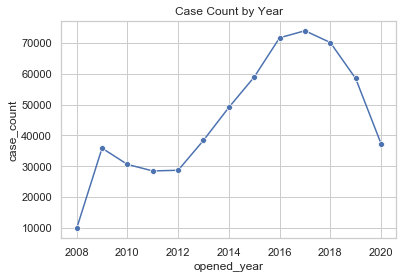

In [64]:
sns.lineplot('opened_year', 'case_count', data = total_case_count_year, marker='o')
plt.title('Case Count by Year')
plt.show()

So far there is a downward trend, although 2020 still has a few months to go.

#### Which months see the most graffiti?

In [29]:
total_case_count_month = sf_graffiti['opened_month'] \
    .value_counts() \
    .to_frame() \
    .reset_index() \
    .rename(columns = {'index' : 'opened_month', 'opened_month' : 'case_count'}) \
    .sort_values(by = 'opened_month')

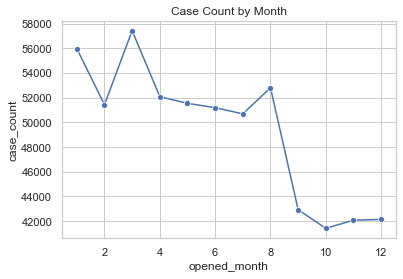

In [63]:
sns.lineplot('opened_month', 'case_count', data = total_case_count_month, marker='o')
plt.title('Case Count by Month')
plt.show()

According to the data, the most graffiti has been reported at the beginning of the year, and drops significantly by September. 

#### Which days of the week see the most graffiti reporting?

In [42]:
total_case_count_dayofweek = sf_graffiti['opened_dayofweek'] \
    .value_counts() \
    .to_frame() \
    .reset_index() \
    .rename(columns = {'index' : 'opened_dayofweek', 'opened_dayofweek' : 'case_count'}) \
    .sort_values(by = 'opened_dayofweek')

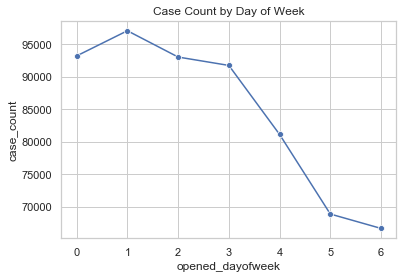

In [62]:
sns.lineplot('opened_dayofweek', 'case_count', data = total_case_count_dayofweek, marker='o')
plt.title('Case Count by Day of Week')
plt.show()

#### Can we bring SF weather data in to see if there are any correlations?

Web scrape:
    https://www.usclimatedata.com/climate/san-francisco/california/united-states/usca0987

#### What about the average counts by month, by year?

In [31]:
#Messing with arrays with code from pandas documentation

arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],
          ['Captive', 'Wild', 'Captive', 'Wild']]
index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
df = pd.DataFrame({'Max Speed': [390., 350., 30., 20.]},
                  index=index)
df

Max Speed
Animal Type              
Falcon Captive      390.0
       Wild         350.0
Parrot Captive       30.0
       Wild          20.0

In [32]:
#Messing with arrays with code from pandas documentation

df.groupby(level=0).mean()

,Max Speed
Animal,
Falcon,370.0
Parrot,25.0


In [33]:
#Messing with arrays with code from pandas documentation

df.groupby(level="Type").mean()

,Max Speed
Type,
Captive,210.0
Wild,185.0


#### Are there any null values in the full data set?

In [34]:
sf_graffiti['opened_year'].isnull().sum()

0

There are no null values in the opened year column.

#### How many duplicate cases are there?

In [35]:
#sf_graffiti['status_notes'].value_counts()

In [36]:
duplicate_status_notes = sf_graffiti[sf_graffiti['status_notes'].str.contains('uplicate', na = False)]

In [37]:
duplicate_status_notes.shape

(36698, 19)

There are 36,698 duplicate cases.

---

#### How many cases were on USPS property? Why is the USPS responsible for dealing with its own graffiti? How has this changed over the years?

In [47]:
usps = sf_graffiti[sf_graffiti['responsible_agency'].str.contains('US Postal Service', na = False)]

In [49]:
total_case_count_year_usps = usps['opened_year'] \
    .value_counts() \
    .to_frame() \
    .reset_index() \
    .rename(columns = {'index' : 'opened_year', 'opened_year' : 'case_count'}) \
    .sort_values(by = 'opened_year')

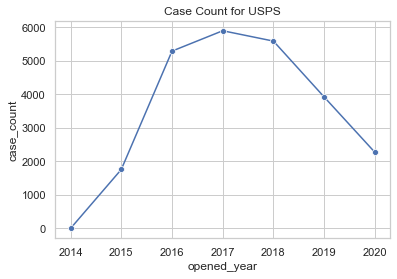

In [61]:
sns.lineplot('opened_year', 'case_count', data = total_case_count_year_usps, marker='o')
plt.title('Case Count for USPS')
plt.show()

In [51]:
usps.request_type.value_counts()

Graffiti on Mail_box                                23612
Graffiti on Other_enter_additional_details_below      651
Graffiti                                              180
Graffiti on Building_commercial                       128
Graffiti on Building_other                             59
Graffiti on City_receptacle                            37
Graffiti on Signal_box                                 13
Graffiti on Building_residential                       13
Graffiti on Sidewalk_structure                         10
Graffiti on Street                                      9
Graffiti on Sidewalk_in_front_of_property               8
Graffiti on News_rack                                   8
Graffiti on Bike_rack                                   3
Graffiti on ATT_Property                                2
Graffiti on Fire_hydrant                                2
Graffiti on Transit_Shelter_Platform                    1
Graffiti on Pole                                        1
Graffiti on Fi

There are 24,740 USPS cases.

---

In [54]:
clear_channel = sf_graffiti[sf_graffiti['responsible_agency'].str.contains('Clear Channel', na = False)]

In [58]:
total_case_count_year_clear_channel = clear_channel['opened_year'] \
    .value_counts() \
    .to_frame() \
    .reset_index() \
    .rename(columns = {'index' : 'opened_year', 'opened_year' : 'case_count'}) \
    .sort_values(by = 'opened_year')

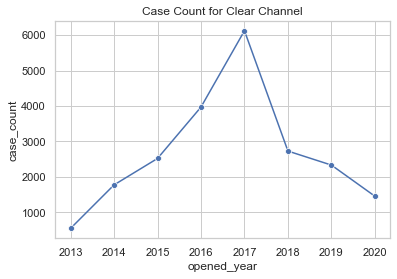

In [60]:
sns.lineplot('opened_year', 'case_count', data = total_case_count_year_clear_channel, marker='o')
plt.title('Case Count for Clear Channel')
plt.show()

---

In [39]:
mission_cleaned = mission.drop(columns = ['caseid', 'opened', 'closed', 'updated', 'status', 'status_notes',
       'responsible_agency', 'category', 'request_type', 'request_details', 'supervisor_district', 'neighborhood', 'source',
       'media_url'])

In [40]:
mission_cleaned.to_csv('../data/mission_cleaned.csv')

---

#### Are there any correlations between transit stops and graffiti?

In [41]:
san_francisco = [37.773972, -122.431297]
san_francisco_map = folium.Map(location = san_francisco, zoom_start = 13)

display(san_francisco_map)